In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
kiva = pd.read_csv('KivaSample-5240.csv')

In [5]:
kiva.info()
kiva.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159037 entries, 0 to 159036
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Status          159037 non-null  int64  
 1   Sector          159037 non-null  object 
 2   Country         159037 non-null  object 
 3   Currency_rate   159037 non-null  float64
 4   Loan_term       159037 non-null  int64  
 5   Message         159037 non-null  int64  
 6   Repay_interval  159037 non-null  object 
 7   Distribution    159037 non-null  object 
 8   predisburse     159037 non-null  int64  
 9   femalePer       159037 non-null  float64
 10  logAmount       159037 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 13.3+ MB


,Status,Sector,Country,Currency_rate,Loan_term,Message,Repay_interval,Distribution,predisburse,femalePer,logAmount
0,1,Housing,Indonesia,0.1,48,3,monthly,field_partner,1,1.0,6.214608
1,1,Food,Philippines,0.0,11,1,monthly,field_partner,1,1.0,3.218876
2,1,Services,Uganda,0.1,8,1,monthly,field_partner,1,0.0,5.783825
3,1,Retail,Nicaragua,0.2,12,1,monthly,field_partner,1,1.0,6.684612
4,1,Food,Kenya,0.1,14,2,monthly,field_partner,1,0.0,5.703782


In [6]:
kiva.shape

(159037, 11)

In [7]:
kiva.columns

Index(['Status', 'Sector', 'Country', 'Currency_rate', 'Loan_term', 'Message',
       'Repay_interval', 'Distribution', 'predisburse', 'femalePer',
       'logAmount'],
      dtype='object')

In [ ]:
#
#1.	Data preparation. Turn the dependent variable ‘Status’ into a categorical variable.
#2.	How many unique levels of Sector variable? Which sector has the most loans (using a bar graph to show)?
#3.	Drop one variable: Country, which has many categories.
#4.	Split the dataset into training (60%) and test (40%) using random selection. Set the seed to 1.
#5.	Prepare X and y using the training dataset.
#6.	Train a decision tree and three ensembled methods.
#7.	Which model performs the best in terms of accuracy rate?
#8.	Use grid search (three parameters: B, lambda, d) to identify the best boosting model.


In [9]:
# prompt: change into status into funded and not funded

import pandas as pd

# Assuming 'kiva' is your DataFrame and 'Status' is the column with numerical data (1 and 0)
# Map 1 to 'Funded' and 0 to 'Not Funded'
kiva['Status_Label'] = kiva['Status'].map({1: 'Funded', 0: 'Not Funded'})

# Optionally, convert 'Status_Label' to a categorical type for more efficient storage and processing
kiva['Status_Label'] = kiva['Status_Label'].astype('category')

# Display the updated DataFrame to confirm the addition of the new column
print(kiva[['Status', 'Status_Label']].head())


   Status Status_Label
0       1       Funded
1       1       Funded
2       1       Funded
3       1       Funded
4       1       Funded


In [11]:
kiva.head()

,Status,Sector,Country,Currency_rate,Loan_term,Message,Repay_interval,Distribution,predisburse,femalePer,logAmount,Status_Label
0,1,Housing,Indonesia,0.1,48,3,monthly,field_partner,1,1.0,6.214608,Funded
1,1,Food,Philippines,0.0,11,1,monthly,field_partner,1,1.0,3.218876,Funded
2,1,Services,Uganda,0.1,8,1,monthly,field_partner,1,0.0,5.783825,Funded
3,1,Retail,Nicaragua,0.2,12,1,monthly,field_partner,1,1.0,6.684612,Funded
4,1,Food,Kenya,0.1,14,2,monthly,field_partner,1,0.0,5.703782,Funded


In [12]:
kiva.shape

(159037, 12)

In [13]:
# Question 2:
unique_sectors = kiva['Sector'].unique()
unique_sectors

array(['Housing', 'Food', 'Services', 'Retail', 'Agriculture',
       'Personal Use', 'Arts', 'Transportation', 'Education', 'Clothing',
       'Manufacturing', 'Health', 'Construction', 'Entertainment',
       'Wholesale'], dtype=object)

In [14]:
# Count the number of loans for each sector
sector_counts = kiva['Sector'].value_counts()
sector_counts

Agriculture       42773
Retail            33283
Food              31122
Services          10918
Housing           10403
Clothing           9040
Personal Use       5405
Transportation     5366
Education          3613
Health             2698
Arts               1772
Construction       1565
Manufacturing       821
Entertainment       136
Wholesale           122
Name: Sector, dtype: int64

In [15]:
# Find the sector with the most loans
most_loans_sector = kiva['Sector'].value_counts().index[0]
most_loans_sector

'Agriculture'

<Figure size 1200x600 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Sector')

Text(0, 0.5, 'Number of Loans')

Text(0.5, 1.0, 'Number of Loans by Sector')

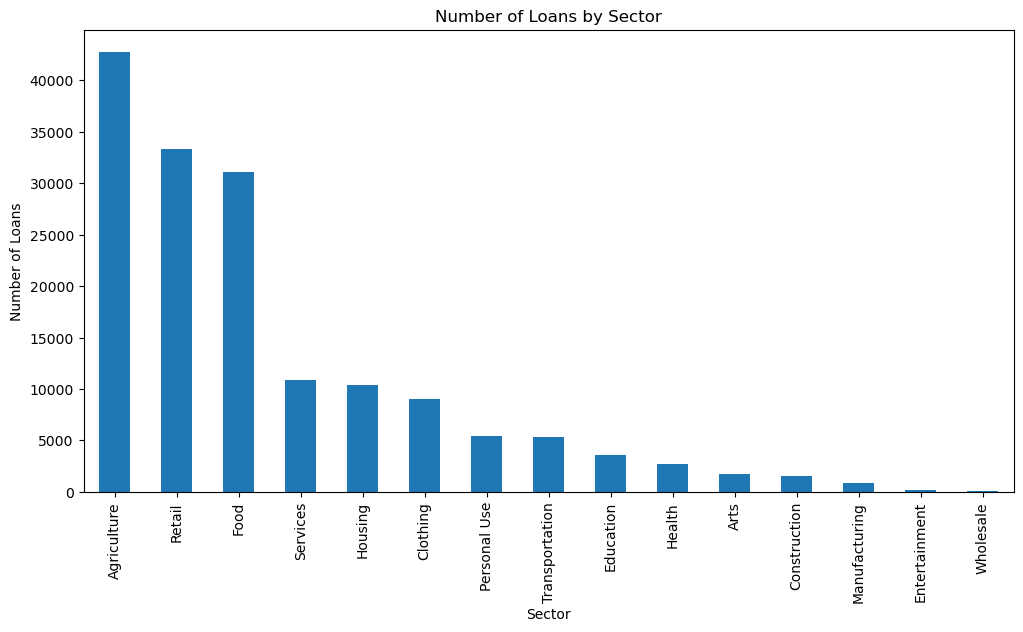

Number of unique sectors: ['Housing' 'Food' 'Services' 'Retail' 'Agriculture' 'Personal Use' 'Arts'
 'Transportation' 'Education' 'Clothing' 'Manufacturing' 'Health'
 'Construction' 'Entertainment' 'Wholesale']
Sector with the most loans: Agriculture


In [16]:
 # Create a bar graph to visualize the number of loans for each sector
plt.figure(figsize=(12, 6))
sector_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Sector')
plt.ylabel('Number of Loans')
plt.title('Number of Loans by Sector')

# Display the bar graph
plt.show()

# Print the results
print(f"Number of unique sectors: {unique_sectors}")
print(f"Sector with the most loans: {most_loans_sector}")


In [17]:
# Question 3:
# prompt: Drop one variable: Country, which has many categories.

kiva = kiva.drop('Country', axis=1)


In [18]:
kiva.head()

,Status,Sector,Currency_rate,Loan_term,Message,Repay_interval,Distribution,predisburse,femalePer,logAmount,Status_Label
0,1,Housing,0.1,48,3,monthly,field_partner,1,1.0,6.214608,Funded
1,1,Food,0.0,11,1,monthly,field_partner,1,1.0,3.218876,Funded
2,1,Services,0.1,8,1,monthly,field_partner,1,0.0,5.783825,Funded
3,1,Retail,0.2,12,1,monthly,field_partner,1,1.0,6.684612,Funded
4,1,Food,0.1,14,2,monthly,field_partner,1,0.0,5.703782,Funded


In [19]:
# prompt: check for null values

kiva.isnull().sum()


Status            0
Sector            0
Currency_rate     0
Loan_term         0
Message           0
Repay_interval    0
Distribution      0
predisburse       0
femalePer         0
logAmount         0
Status_Label      0
dtype: int64

In [ ]:
kiva.head(20)

,Status,Sector,Currency_rate,Loan_term,Message,Repay_interval,Distribution,predisburse,femalePer,logAmount,Status_Label
0,1,Housing,0.1,48,3,monthly,field_partner,1,1.0,6.214608,Funded
1,1,Food,0.0,11,1,monthly,field_partner,1,1.0,3.218876,Funded
2,1,Services,0.1,8,1,monthly,field_partner,1,0.0,5.783825,Funded
3,1,Retail,0.2,12,1,monthly,field_partner,1,1.0,6.684612,Funded
4,1,Food,0.1,14,2,monthly,field_partner,1,0.0,5.703782,Funded
5,1,Agriculture,0.1,9,2,bullet,field_partner,1,0.0,7.130899,Funded
6,1,Food,0.1,3,2,monthly,field_partner,1,1.0,3.218876,Funded
7,1,Services,0.1,8,1,monthly,field_partner,1,1.0,5.010635,Funded
8,1,Personal Use,0.1,15,1,bullet,field_partner,0,0.0,4.605170,Funded
9,1,Agriculture,0.1,15,1,irregular,field_partner,1,0.0,5.703782,Funded


In [ ]:
kiva.columns

Index(['Status', 'Sector', 'Currency_rate', 'Loan_term', 'Message',
       'Repay_interval', 'Distribution', 'predisburse', 'femalePer',
       'logAmount', 'Status_Label'],
      dtype='object')

In [20]:
X = kiva.drop(['Status', 'Status_Label'], axis = 1)
y = kiva['Status_Label']

In [21]:
X.columns

Index(['Sector', 'Currency_rate', 'Loan_term', 'Message', 'Repay_interval',
       'Distribution', 'predisburse', 'femalePer', 'logAmount'],
      dtype='object')

In [22]:
# prompt: create dummies for categoricall variable for X 'Sector', 'Currency_rate', 'Loan_term', 'Message', 'Repay_interval',
#        'Distribution', 'predisburse', 'femalePer', 'logAmount'

X = pd.get_dummies(X, columns=['Sector', 'Repay_interval','Distribution'])


In [ ]:
X.head()
y.head()

,Currency_rate,Loan_term,Message,predisburse,femalePer,logAmount,Sector_Agriculture,Sector_Arts,Sector_Clothing,Sector_Construction,...,Sector_Personal Use,Sector_Retail,Sector_Services,Sector_Transportation,Sector_Wholesale,Repay_interval_bullet,Repay_interval_irregular,Repay_interval_monthly,Distribution_direct,Distribution_field_partner
0,0.1,48,3,1,1.0,6.214608,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,0.0,11,1,1,1.0,3.218876,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,0.1,8,1,1,0.0,5.783825,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
3,0.2,12,1,1,1.0,6.684612,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True
4,0.1,14,2,1,0.0,5.703782,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


0    Funded
1    Funded
2    Funded
3    Funded
4    Funded
Name: Status_Label, dtype: category
Categories (2, object): ['Funded', 'Not Funded']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


In [24]:
# Display the shapes of the train and test sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (95422, 26)
Shape of y_train: (95422,)
Shape of X_test: (63615, 26)
Shape of y_test: (63615,)


In [25]:
dt_1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [26]:
dt_1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [32]:
kiva_names_list = X.columns
kiva_names_list

Index(['Currency_rate', 'Loan_term', 'Message', 'predisburse', 'femalePer',
       'logAmount', 'Sector_Agriculture', 'Sector_Arts', 'Sector_Clothing',
       'Sector_Construction', 'Sector_Education', 'Sector_Entertainment',
       'Sector_Food', 'Sector_Health', 'Sector_Housing',
       'Sector_Manufacturing', 'Sector_Personal Use', 'Sector_Retail',
       'Sector_Services', 'Sector_Transportation', 'Sector_Wholesale',
       'Repay_interval_bullet', 'Repay_interval_irregular',
       'Repay_interval_monthly', 'Distribution_direct',
       'Distribution_field_partner'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

[Text(0.5, 0.875, 'Message <= 1.5\nentropy = 1.0\nsamples = 95422\nvalue = [47299, 48123]'),
 Text(0.25, 0.625, 'logAmount <= 5.959\nentropy = 0.966\nsamples = 77968\nvalue = [30555, 47413]'),
 Text(0.125, 0.375, 'Loan_term <= 9.5\nentropy = 0.576\nsamples = 15374\nvalue = [13270, 2104]'),
 Text(0.0625, 0.125, 'entropy = 0.028\nsamples = 6797\nvalue = [6778, 19]'),
 Text(0.1875, 0.125, 'entropy = 0.8\nsamples = 8577\nvalue = [6492, 2085]'),
 Text(0.375, 0.375, 'Loan_term <= 8.5\nentropy = 0.85\nsamples = 62594\nvalue = [17285, 45309]'),
 Text(0.3125, 0.125, 'entropy = 0.508\nsamples = 4654\nvalue = [4130, 524]'),
 Text(0.4375, 0.125, 'entropy = 0.773\nsamples = 57940\nvalue = [13155, 44785]'),
 Text(0.75, 0.625, 'Loan_term <= 14.5\nentropy = 0.245\nsamples = 17454\nvalue = [16744, 710]'),
 Text(0.625, 0.375, 'logAmount <= 6.136\nentropy = 0.048\nsamples = 13381\nvalue = [13310, 71]'),
 Text(0.5625, 0.125, 'entropy = 0.002\nsamples = 7504\nvalue = [7503, 1]'),
 Text(0.6875, 0.125, 'entr

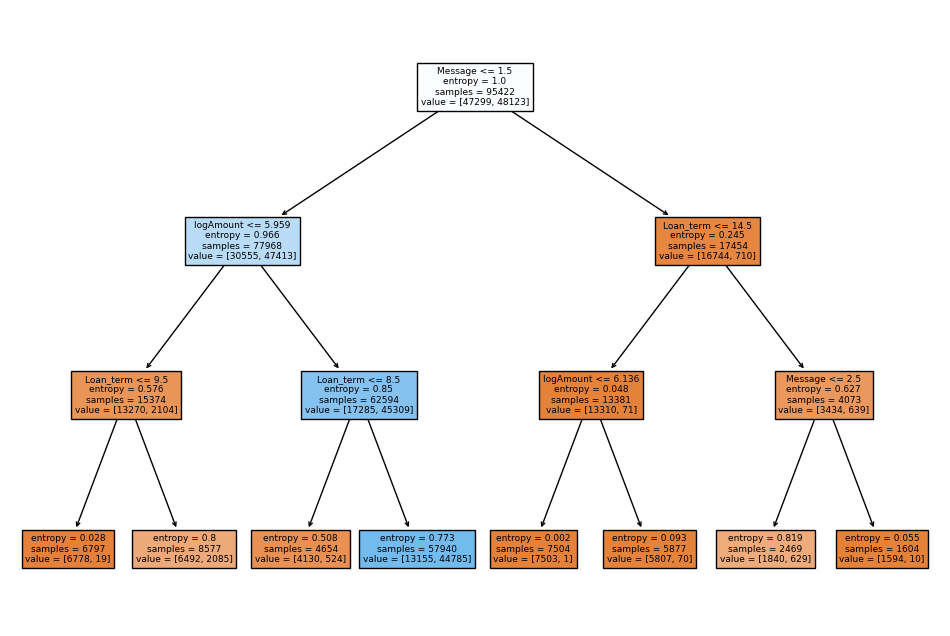

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming dt_1 is your decision tree model and car_names is derived from a DataFrame
# Convert car_names from pandas.Index or any other format to a list
kiva_names_list = kiva_names.tolist()  # Convert to list if car_names is a pandas.Index

plt.figure(figsize=(12, 8))
plot_tree(dt_1, filled=True, feature_names=kiva_names_list)
plt.show()  # Ensure to call plt.show() to display the figure


In [35]:
print(export_text(dt_1, feature_names=kiva_names.tolist(), show_weights=True))

|--- Message <= 1.50
|   |--- logAmount <= 5.96
|   |   |--- Loan_term <= 9.50
|   |   |   |--- weights: [6778.00, 19.00] class: Funded
|   |   |--- Loan_term >  9.50
|   |   |   |--- weights: [6492.00, 2085.00] class: Funded
|   |--- logAmount >  5.96
|   |   |--- Loan_term <= 8.50
|   |   |   |--- weights: [4130.00, 524.00] class: Funded
|   |   |--- Loan_term >  8.50
|   |   |   |--- weights: [13155.00, 44785.00] class: Not Funded
|--- Message >  1.50
|   |--- Loan_term <= 14.50
|   |   |--- logAmount <= 6.14
|   |   |   |--- weights: [7503.00, 1.00] class: Funded
|   |   |--- logAmount >  6.14
|   |   |   |--- weights: [5807.00, 70.00] class: Funded
|   |--- Loan_term >  14.50
|   |   |--- Message <= 2.50
|   |   |   |--- weights: [1840.00, 629.00] class: Funded
|   |   |--- Message >  2.50
|   |   |   |--- weights: [1594.00, 10.00] class: Funded



In [36]:
dt_1_pred = dt_1.predict(X_test)

In [37]:
accuracy_score(y_test, dt_1_pred)
confusion_matrix(y_test, dt_1_pred)

0.8259687180696377

array([[22738,  8763],
       [ 2308, 29806]])

In [38]:
pd.crosstab(y_test, dt_1_pred, rownames=['True'], colnames=['Predicted'])#, margins=True)

Predicted,Funded,Not Funded
True,,
Funded,22738,8763
Not Funded,2308,29806


In [40]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [41]:
# Bagging is the special case of random forest: it uses all variables to grow trees
dt_bag = RandomForestClassifier(n_estimators=500, max_features=None, random_state=0)

# n_estimators default is 100. We can increase it.
# max_features default is to use all variables

In [42]:
dt_bag.fit(X_train, y_train)

dt_bag_pred = dt_bag.predict(X_test)

accuracy_score(y_test, dt_bag_pred)
confusion_matrix(y_test, dt_bag_pred)
# You can try increase n_estimator to 500.

RandomForestClassifier(max_features=None, n_estimators=500, random_state=0)

0.8862846812858602

array([[26673,  4828],
       [ 2406, 29708]])

In [43]:
dt_rf = RandomForestClassifier(n_estimators=500, max_features = 5, random_state=0)
# max_features is set to sqrt(p), about 4.

In [44]:
dt_rf.fit(X_train, y_train)

dt_rf_pred = dt_rf.predict(X_test)

accuracy_score(y_test, dt_rf_pred)
confusion_matrix(y_test, dt_rf_pred)

RandomForestClassifier(max_features=5, n_estimators=500, random_state=0)

0.8870706594356677

array([[26708,  4793],
       [ 2391, 29723]])

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 26 artists>

([<matplotlib.axis.YTick at 0x15d7e9250>,
 [Text(0, 0, 'Sector_Wholesale'),
  Text(0, 1, 'Sector_Entertainment'),
  Text(0, 2, 'Sector_Health'),
  Text(0, 3, 'Sector_Construction'),
  Text(0, 4, 'Sector_Transportation'),
  Text(0, 5, 'Repay_interval_irregular'),
  Text(0, 6, 'Sector_Personal Use'),
  Text(0, 7, 'Distribution_direct'),
  Text(0, 8, 'Sector_Housing'),
  Text(0, 9, 'Sector_Clothing'),
  Text(0, 10, 'Sector_Services'),
  Text(0, 11, 'Distribution_field_partner'),
  Text(0, 12, 'Sector_Food'),
  Text(0, 13, 'Repay_interval_bullet'),
  Text(0, 14, 'Sector_Manufacturing'),
  Text(0, 15, 'Repay_interval_monthly'),
  Text(0, 16, 'Sector_Arts'),
  Text(0, 17, 'Sector_Agriculture'),
  Text(0, 18, 'Sector_Retail'),
  Text(0, 19, 'predisburse'),
  Text(0, 20, 'Sector_Education'),
  Text(0, 21, 'femalePer'),
  Text(0, 22, 'Currency_rate'),
  Text(0, 23, 'Message'),
  Text(0, 24, 'Loan_term'),
  Text(0, 25, 'logAmount')])

Text(0.5, 0, 'Importance Score')

Text(0, 0.5, 'Feature')

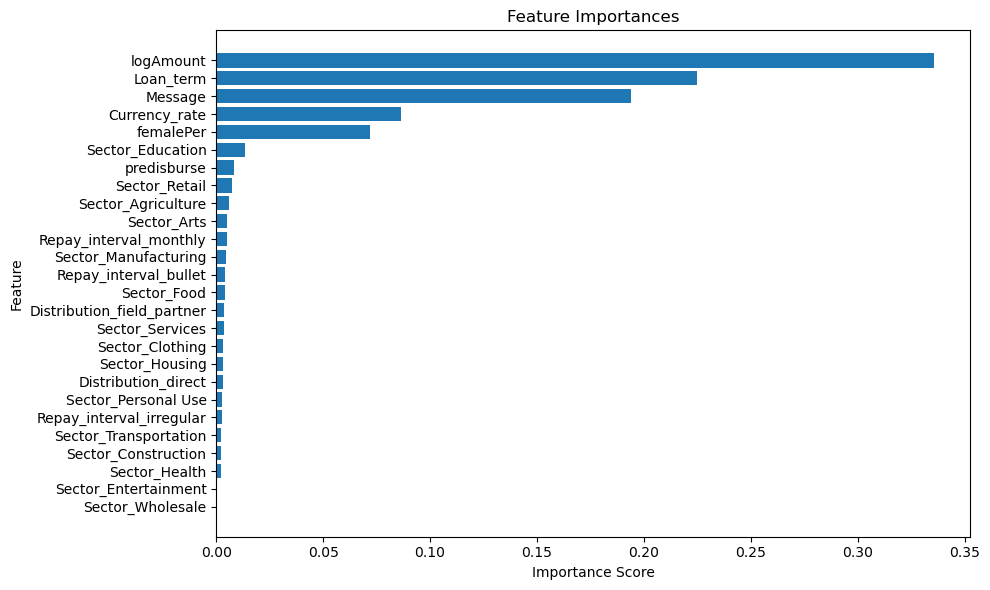

In [45]:
feature_importances = dt_rf.feature_importances_
# This is a numpy array

# Sort feature importances in descending order
sort_index = np.argsort(feature_importances)
# sort_index = sort_index[::-1]
# argsort() returns the index position that the element would have
# if the array were sorted in ascending order.
# We can use it to select feature importance and

# Plot horizontal feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), feature_importances[sort_index], align="center")
plt.yticks(range(X.shape[1]), np.array(X.columns)[sort_index])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()

In [47]:
dt_gb = GradientBoostingClassifier(n_estimators=1000, learning_rate =0.001, max_depth=3, random_state=0)
# B = 100, lambda = 0.001, d = 3

In [48]:
dt_gb.fit(X_train, y_train)
dt_gb_pred = dt_gb.predict(X_test)
accuracy_score(y_test, dt_gb_pred)
confusion_matrix(y_test, dt_gb_pred)

GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=0)

0.8385286489035605

array([[23353,  8148],
       [ 2124, 29990]])

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [1, 2, 3]
}

# Initialize the classifier
dt_gb = GradientBoostingClassifier()

# Initialize GridSearchCV
tree_grid = GridSearchCV(dt_gb, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV
tree_grid.fit(X, y)

# Get the best estimator
best_tree = tree_grid.best_estimator_

# Predict on the test set using the best estimator
best_tree_pred = best_tree.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, best_tree_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, best_tree_pred)

# Output the best parameters, accuracy score, and confusion matrix
print("Best Parameters: ", tree_grid.best_params_)
print("Accuracy Score: ", accuracy)
print("Confusion Matrix: \n", conf_matrix)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
Accuracy Score:  0.8957321386465457
Confusion Matrix: 
 [[26545  4956]
 [ 1677 30437]]
